In [9]:
# Problem Statement

Assume that the frequency-dependent molar absorption coefficient is given by

\[
\epsilon(\omega) = \epsilon_{\text{max}} \cdot \frac{g(\omega)}{g_{\text{max}}}
\]

with the lineshape function

\[
g(\omega) = \frac{1}{\pi} \cdot \frac{\gamma}{(\omega - \omega_0)^2 + \gamma^2}
\]

where \( \omega \) is the angular frequency. Here, \( g_{\text{max}} \) denotes the maximum of \( g(\omega) \).

### Tasks

1. **Determine the dimension of \( g(\omega) \)**.

2. **Sketch \( g(\omega) \) as a function of \( \omega \).**

3. **Calculate the integral \( \int_{-\infty}^{\infty} g(\omega) \, d\omega \).**

4. **Calculate the full width at half maximum (FWHM) of \( g(\omega) \).**

5. **Calculate the corresponding oscillator strength \( f \).**

For chlorophylls, we have approximately:

\[
\epsilon_{\text{max}} \approx 70 \times 10^3 \, \text{L mol}^{-1} \, \text{cm}^{-1}
\]

The FWHM is approximately \( 20 \, \text{nm} \) at a maximum wavelength of \( 660 \, \text{nm} \).

### Equations and Calculations

1. **Integral of \( g(\omega) \):**

   We can calculate the integral \( \int_{-\infty}^{\infty} g(\omega) \, d\omega \) analytically, as it represents the area under the Lorentzian lineshape.

2. **FWHM Calculation:**

   The FWHM corresponds to the width at which \( g(\omega) = \frac{g_{\text{max}}}{2} \). Solving this equation gives the FWHM.

3. **Oscillator Strength \( f \):**

   The oscillator strength \( f \) can be calculated using the formula:

   \[
   f = (4.32 \times 10^{-9}) \cdot \epsilon_{\text{max}} \cdot \text{FWHM (in cm}^{-1}\text{)}
   \]

4. **Conversion of FWHM from nm to cm\(^{-1}\):**

   For a given FWHM in wavelength \( \Delta \lambda \) (in nm) at a wavelength \( \lambda \) (in nm), the corresponding FWHM in wavenumbers (cm\(^{-1}\)) can be calculated as:

   \[
   \text{FWHM(cm}^{-1}\text{)} = \frac{\Delta \lambda}{\lambda^2} \cdot c
   \]

   where \( c \) is the speed of light in cm/s (approximately \( 3 \times 10^{10} \, \text{cm/s} \)).


SyntaxError: invalid syntax (370689241.py, line 3)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.optimize import fsolve

In [2]:
# Parameters for the lineshape function
ω0 = 0  # Center frequency (assuming ω0 = 0 for simplicity)
γ = 1   # Broadening parameter for the Lorentzian lineshape

# Define the symbolic variable and the lineshape function g(ω)
ω = sp.symbols('ω')
g = (1 / sp.pi) * (γ / ((ω - ω0)**2 + γ**2))

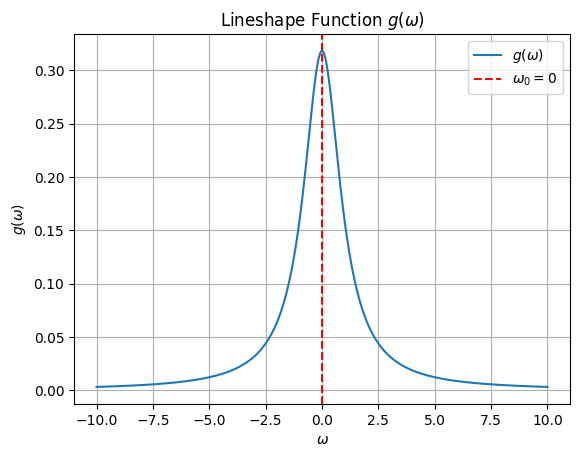

In [4]:
# Calculate gmax (the maximum of g(ω))
g_max = g.subs(ω, ω0)

# Sketch g(ω) numerically
ω_vals = np.linspace(-10, 10, 1000)
g_vals = [g.subs(ω, w).evalf() for w in ω_vals]

plt.plot(ω_vals, g_vals, label=r"$g(\omega)$")
plt.axvline(ω0, color='red', linestyle='--', label=r"$\omega_0=0$")
plt.title("Lineshape Function $g(\\omega)$")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$g(\omega)$")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Calculate the integral of g(ω) from -∞ to ∞ using SymPy
integral = sp.integrate(g, (ω, -sp.oo, sp.oo))
print(f"Integral of g(ω) from -∞ to ∞: {integral}")

Integral of g(ω) from -∞ to ∞: 1


In [7]:
# Calculate the FWHM of g(ω)
# FWHM occurs where g(ω) = g_max / 2
half_max = g_max / 2

# Define the function to solve for FWHM points
fwhm_eq = sp.Eq(g, half_max)

# Solve for the points where g(ω) = g_max / 2
solutions = sp.solveset(fwhm_eq, ω, domain=sp.S.Reals)
ω_left, ω_right = [sol.evalf() for sol in solutions]
fwhm = ω_right - ω_left
print(f"FWHM: {fwhm}")

FWHM: 2.00000000000000


In [10]:
# Given parameters for the oscillator strength calculation
ε_max = 70e3  # Molar absorption coefficient in L mol⁻¹ cm⁻¹
λ_max = 660   # Wavelength in nm
fwhm_nm = 20  # FWHM in nm

# Convert FWHM from nm to cm⁻¹ using the relationship Δν̅ = (Δλ / λ^2) * c
# where c is the speed of light in cm/s
c = 3e10  # Speed of light in cm/s
fwhm_cm1 = (fwhm_nm / λ_max**2) * c * 1e7  # Convert nm to cm⁻¹

# Print FWHM in cm⁻¹ using scientific notation
print(f"FWHM in cm⁻¹: {fwhm_cm1:.2e}")

# Calculate the oscillator strength f using the formula:
# f = (4.32 × 10⁻⁹) * ε_max * FWHM(cm⁻¹)
oscillator_strength = 4.32e-9 * ε_max * fwhm_cm1

# Print the oscillator strength using scientific notation
print(f"Oscillator strength: {oscillator_strength:.4e}")


FWHM in cm⁻¹: 1.38e+13
Oscillator strength: 4.1653e+09


In [ ]:
import numpy as np
from scipy.constants import c, epsilon_0, e, N_A, m_e

# Calculate the formula: (2 * m_2 * c * epsilon_0) / (pi * e^2 * N_A)
result = (2 * m_e * c * epsilon_0) / (np.pi * e**2 * N_A * np.log(10))

# Output the result
print(f"Result of the formula: {result:.4e}")

In [18]:
from scipy.constants import c, epsilon_0, e, m_e

# Print the constants and their units
print(f"Speed of light (c): {c:.2e} m/s")
print(f"Vacuum permittivity (epsilon_0): {epsilon_0:.2e} F/m")
print(f"Electron charge (e): {e:.2e} C")
print(f"Electron mass (m_e): {m_e:.2e} kg")

import quantities as pq

# Conversion factors
m_to_cm = 100  # 1 m = 100 cm
kg_to_g = 1000  # 1 kg = 1000 g
C_to_esu = 3.33564e9  # 1 C = 3.33564e9 esu

# Convert the constants to CGS units
c_cgs = c * m_to_cm / pq.s  # Speed of light in cm/s
epsilon_0_cgs = epsilon_0 * (C_to_esu**2) / (m_to_cm**3)  # Vacuum permittivity in esu^2 / cm^3
e_cgs = e * C_to_esu  # Elementary charge in esu
m_e_cgs = m_e * kg_to_g  # Electron mass in g

# Output the constants in CGS units
print(f"Speed of light (c): {c_cgs:.2e} cm/s")
print(f"Vacuum permittivity (epsilon_0): {epsilon_0_cgs:.2e} esu² / cm³")
print(f"Electron charge (e): {e_cgs:.2e} esu")
print(f"Avogadro's number (N_A): {N_A:.2e} 1/mol")
print(f"Electron mass (m_e): {m_e_cgs:.2e} g")


Speed of light (c): 3.00e+08 m/s
Vacuum permittivity (epsilon_0): 8.85e-12 F/m
Electron charge (e): 1.60e-19 C
Electron mass (m_e): 9.11e-31 kg
Speed of light (c): 3.00e+10 1/s cm/s
Vacuum permittivity (epsilon_0): 9.85e+01 esu² / cm³
Electron charge (e): 5.34e-10 esu
Avogadro's number (N_A): 6.02e+23 1/mol
Electron mass (m_e): 9.11e-28 g


In [13]:
np.log(10)

np.float64(2.302585092994046)